 <a id='ReturntoTop'></a>
<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>Oregon Wildlife - Image Classification Capstone</h1>
      <h3>Notebook 3 - Regularization Strategies</h3>
      <p>Author: David Lappin | Company: BrainStation | Date: 3/1/2023 - 4/11/2023 </p>
    </div>
    <img src="bannerphoto/bannereagle.jpg" alt="your-image-description" style="height:150px; margin-left:20px; border: 4px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose


In order to address our data leakage and overfitting concerns we are going to implement some new layers to improve our baseline model. We will try a variety of regularization and normalization techniques:

### Data Augmentation -

Data augmentation is a way of preprocessing our images to change their orientation, zoom ect...By doing this you are creating 'additional data' for your model to train on. In reality, there is no real additional data, but the different perspectives allow the model to view each of the images in a variety of ways. This injects noise into the data set and increases its complexity. Ideally this will be our main combatant against our potential data leakage problem such that the increased perspectives of each imagae will limit our models ability to 'memorize' images that may be duplicated.

### Batch Normalization -
Batch normalization normalizes the inputs of each layer in the network such that the each input has a similar distribution of values. This allows the network as a whole to learn based on simlar input values and reduces the chance of bias. This helps the model to learn faster and more accurately, as well as increases the over-all stability of the model. Batch normalization, while not specifically a regularization technique, does act in a way that ultimately helps to prevent overfitting and generalization.


### Dropout -
Drop out is a regularization technique that randomly deactivates neurons in the network by a pre-determined amount. By randomly dropping neurons, it forces the model to generalize better by reducing the chances it will rely too heavily on one neuron. This allows the model to train in a more uniform and distributed way and as a result, reduces overfitting.






In our new model we will implement these strategies and then evaluate the model to determine if they enforced any changes in the performance. 


# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Prepare Data](#3)

[Implement Data Augmentation](#4)

[Create and Compile New Model](#5)

[Fit and Run Model](#6)

[Preliminary Model Evaluation](#7)

[Import Test Data and Make Predictions](#8)

[Optional Loading of Saved Model](#9)

[Predict on New Data](#10)

[Summary and Next Steps](#11)

 # Packages Import:
 <a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**OS** - interaction with the native OS Python (used for establishing relative path to data files)

**PIL** - Python Imaging Library. Original support for python to deal with images

**glob** - Useful for finding pathname sbased on specific patterns

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**visualkeras** - allows to visualize CNN model architechture

**Tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Keras** - Application Program interface (API) built on tensorflow. Used for implementing neural networks (supports backend computation in tensor flow up to 2.3)

     

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import visualkeras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

# Import Data:
 <a id='2'></a>
[Return to Top](#ReturntoTop)

In [4]:
#set local path to files for basic exploration

trainpath = 'data/oregon_wildlife/' # This is the relative path to the data
valpath = 'data/oregon_wildlife_validation/' # This is the relative path to the data
testpath = 'data/oregon_wildlife_test/' # This is the relative path to the data

Ensure Data is still in the same state as we left it from the previous EDA before modeling.

In [ ]:
#create and save lists of all file stored in each directory

train_files = os.listdir(trainpath) 
val_files = os.listdir(valpath) 
test_files = os.listdir(testpath) 

In [5]:
#create counts of each class for the training set

totalcount_train = [] #empty list to store counts
class_for_count = [] #empty list to store class names


for file in train_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_train.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in train directory: {sum(totalcount_train)}')

588: bald_eagle
560: black_bear
535: bobcat
558: canada_lynx
580: columbian_black-tailed_deer
518: cougar
581: coyote
608: deer
505: elk
513: gray_fox
575: gray_wolf
420: mountain_beaver
536: nutria
569: raccoon
495: raven
602: red_fox
426: ringtail
540: seals
570: sea_lions
571: virginia_opossum
Total images: 10850


In [6]:
#create counts of each class for the validation set

totalcount_val = [] #empty list to store counts
class_for_count_val = [] #empty list to store class names

for file in val_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_validation/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_val.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in validation directory: {sum(totalcount_val)}')

135: bald_eagle
135: black_bear
135: bobcat
135: canada_lynx
135: columbian_black-tailed_deer
135: cougar
135: coyote
135: deer
135: elk
135: gray_fox
135: gray_wolf
135: mountain_beaver
135: nutria
135: raccoon
135: raven
135: red_fox
135: ringtail
135: seals
135: sea_lions
135: virginia_opossum
Total images: 2700


In [7]:
#create counts of each class for the test set

totalcount_test = [] #empty list to store counts
class_for_count_test = [] #empty list to store class names

for file in test_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_test/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_test.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in test directory: {sum(totalcount_test)}')

20: bald_eagle
20: black_bear
20: bobcat
20: canada_lynx
20: columbian_black-tailed_deer
20: cougar
20: coyote
20: deer
20: elk
20: gray_fox
20: gray_wolf
20: mountain_beaver
20: nutria
20: raccoon
20: raven
20: red_fox
20: ringtail
20: seals
20: sea_lions
20: virginia_opossum
Total images: 400


### Observations: 
Everything looks the same.

# Prepare Data:
 <a id='3'></a>
[Return to Top](#ReturntoTop)

Define image loading parameters:

In [8]:
#specify the batch size
batch_size = 32  

#specify the dimensions of the image input
img_height = 180
img_width = 180

For now we are goin to leave the hieght and widgth at 180x180. If we need to reduce the complexity of the photos later for modeling we can reduce these values.

In [9]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  trainpath,  #path to files
  label_mode='int',  #encode labels as integers
  seed=7,
  image_size=(img_height, img_width),  #defined by loading parameters
  batch_size=batch_size)


val_set = tf.keras.preprocessing.image_dataset_from_directory(
  valpath,  #path to files
  label_mode='int',  #encode labels as integers
  seed=7,
  image_size=(img_height, img_width),  #defined by loading parameters
  batch_size=batch_size)

Found 10850 files belonging to 20 classes.
Found 2700 files belonging to 20 classes.


**Note** These values match the counts from the directory above. 

In [10]:
#save and check class_names in the training set

class_names = train_set.class_names
len(class_names)


20

Below:
- **Autotune** allows for CPU performance optimizaiton
- **Cache** - stores imported images in memory for future epoch iterations
- **prefetch** - allows for overlapping of preprocess and training

In [11]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


# Implement Data Augmentation     
<a id='4'></a>
[Return to Top](#ReturntoTop)

As stated in the introduction we are going to implement data augmentation as a means of regularization. Additionally, the added noise should alleviate the potential data leakage problem. We will define our data augmentation process below and then test it on an image to confirm it works.


##### SOURCE:
https://www.tensorflow.org/tutorials/images/classification#data_augmentation

In [12]:
# creates an augmentation sequence that can be used on a single example to create new variations

#use sequential to define multiple layers in sequence for data augmentation process
data_augmentation = keras.Sequential(
  [
    #define the input parameters for the image dimensions and complete a random horizontal flip of the image
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
      
    # Randomly rotate the image by 10% (10% of 180 degrees = 18 degrees per rotation)  
    layers.RandomRotation(0.1),
      
    #randomly zoom by 10%  
    layers.RandomZoom(0.1),
  ]
)

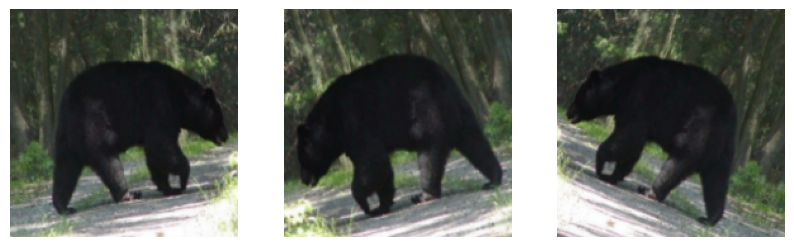

In [13]:
#generate plot and specify size
plt.figure(figsize=(10, 10))

#take an image from the training set
for images, _ in train_set.take(1):
    
  #repeat for 3 augmentations
  for i in range(3):
    
    #implement the data augmentation on the selected images (1)
    augmented_images = data_augmentation(images)
    
    #add each image to subplot
    ax = plt.subplot(1, 3, i + 1)
    
    #plot the image, note unit8 converts the numpy array onto a scale 0-255 which allows imshow to regenerate the
        #image representation
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    
    #remove axis (dont need to see dimensions)
    plt.axis("off")


# Observations

In the above example we can see our augmentation in action. While we only compelted this three times, there are many more variations in which this could take effect.

Next we can re-build our model and make sure to include the data augmentation layer.

# Create and Compile New Model
 <a id='5'></a>
[Return to Top](#ReturntoTop)


We can now move on to building the model which will include the data augmentation and a bit more complexity in the form of additional dense layers, batch normalization between convolution blocks, and drop out between dense layers.

In [15]:
#redefine the input values for the data to 180x180 for the rescaling layer
num_classes = len(class_names)
img_height = 180
img_width = 180


#define model sequential
Batchnorm_model = Sequential([
  
  #include rescaling layer directly in model build   
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  #include data augmentation (note we do not need to use layers. because the layers are defined and stored 
    #in the data_augmentation variable)  
  data_augmentation,  
   
   '''    
  Include the convolution blocks with max pooling layers, and 'relu' activation. 
  Padding ensures the output feature map has the same dimensions as the input feature map. 
  Include batch normalization in each of the convolutions to improve on the stability and 
  performance of the model   
  '''  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
   
    
  #Flatten to convert to one dimension
  layers.Flatten(),
    
  #Dense Layers  
  layers.Dense(128, activation='relu'),
    
  #include a drop out layer with 20% drop out  
  layers.Dropout(0.2), 
    
  #output layer with softmax activation and the out put defined by the number of classes (20)  
  layers.Dense(num_classes, activation = 'softmax')
])


Compile the model using:
- Adam Optimzer (high performing gradient decent method, default learning rate = 0.001)
 - note there are other options but we will stick with Adam
- SparseCategoricalCrossentropy loss calcualtion  (used when there are more than two classes or labels and required when data is labeled using "int")

In [16]:
#compile the model

Batchnorm_model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [17]:
#look at the compiled model summary 

Batchnorm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)       

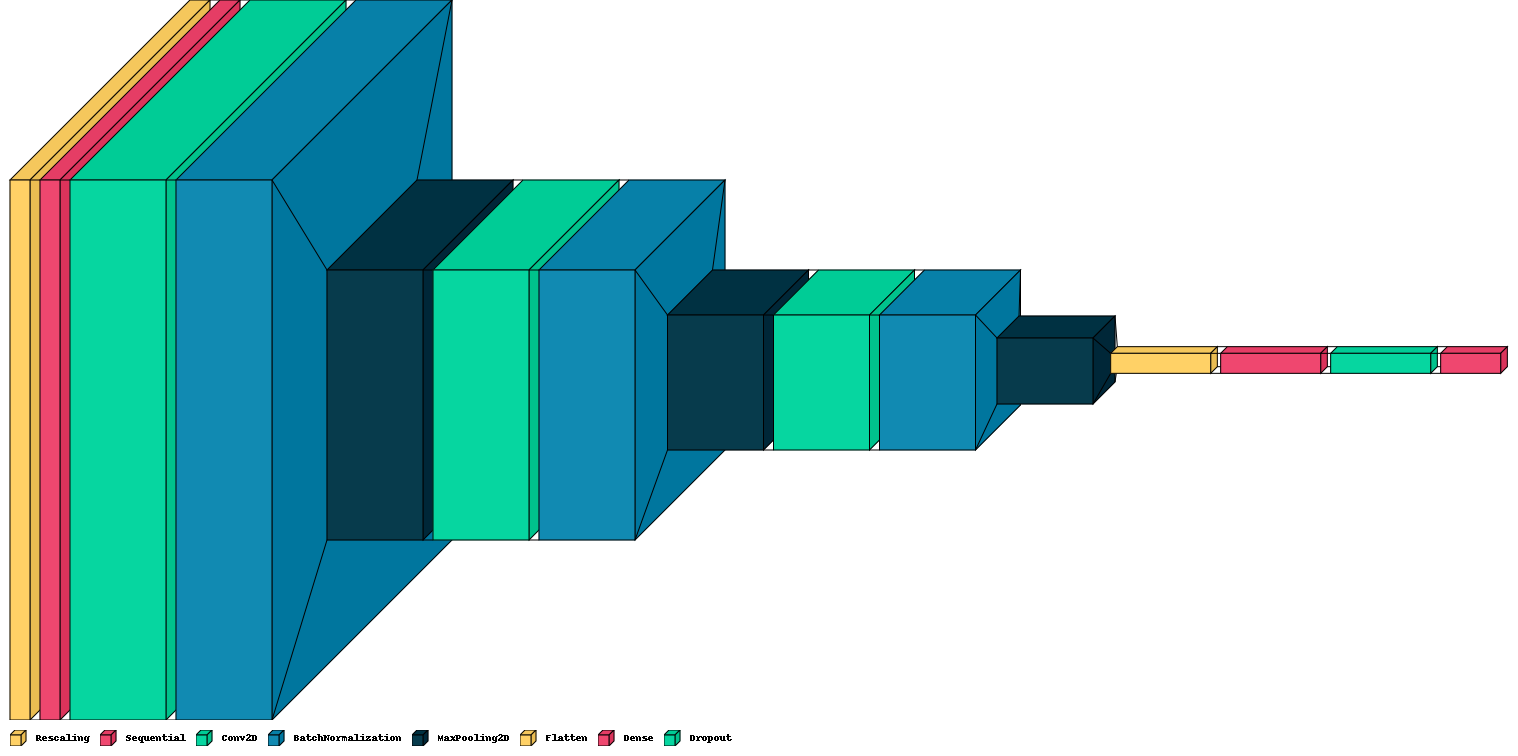

In [66]:
#visualize the model summary with VisualKeras

visualkeras.layered_view(Batchnorm_model, legend = True, draw_volume = True, scale_xy=3, scale_z=3, max_z=100, \
                         to_file = 'modelvisualizations/Batchnorm_model.png')


# Fit and Run
 <a id='6'></a>
[Return to Top](#ReturntoTop)

In our new model we have now compiled all the layers. There are ~2million trainable parameters, and we see our output layer is 20 which matches our class labels. 

Next we can fit our model to the training data using 75 epochs or until early stopped as defined by the callback below. Our model will be validated on the validation split. The test set will be saved for predictions later. 

In [22]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.05, patience=5)

In [24]:
#fit model for 75 epochs
epochs = 75

#save history  and fit the model to the train set and validate on the val set, use call backs as defined above
history = Batchnorm_model.fit(   
  train_set,            
  validation_data=val_set, 
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/75
340/340 [==============================] - 198s 575ms/step - loss: 3.0022 - accuracy: 0.0986 - val_loss: 4.3762 - val_accuracy: 0.0956
Epoch 2/75
340/340 [==============================] - 188s 553ms/step - loss: 2.8668 - accuracy: 0.1075 - val_loss: 2.8633 - val_accuracy: 0.1033
Epoch 3/75
340/340 [==============================] - 186s 546ms/step - loss: 2.8305 - accuracy: 0.1182 - val_loss: 2.8124 - val_accuracy: 0.1363
Epoch 4/75
340/340 [==============================] - 188s 554ms/step - loss: 2.7862 - accuracy: 0.1276 - val_loss: 2.8126 - val_accuracy: 0.1374
Epoch 5/75
340/340 [==============================] - 188s 553ms/step - loss: 2.7384 - accuracy: 0.1449 - val_loss: 2.7563 - val_accuracy: 0.1570
Epoch 6/75
340/340 [==============================] - 188s 553ms/step - loss: 2.6765 - accuracy: 0.1692 - val_loss: 2.7488 - val_accuracy: 0.1952
Epoch 7/75
340/340 [==============================] - 188s 552ms/step - loss: 2.6488 - accuracy: 0.1787 - val_loss: 2.8383 -

### Observations:

Completed all 75 epochs. We should note that there was limited improvement to the model around 30 epochs (which will be more obvious in our visualizations below). Ideally the model would have stopped training based on our `Early Stopping` parameter, but it is possible we need to adjust the early stopping. In the future we may reduce the patience from `5` to `3` so that it requires fewer consequative epochs with no improvement to stop training.

We can now save the model for future loading and begin to visualize and evaluate our baseline model:

Save the model: (note this code is only needed if you plan to save the model weights after running)

In [25]:
#save the model weights for use in predictions later if desired

#Batchnorm_model.save('models/Batch_normalization.h5')

# Preliminary Evaluation
 <a id='7'></a>
[Return to Top](#ReturntoTop)


We can visualize the model perfmormance.

##### SOURCE - plot code base from TF Guide:
https://www.tensorflow.org/tutorials/images/classification

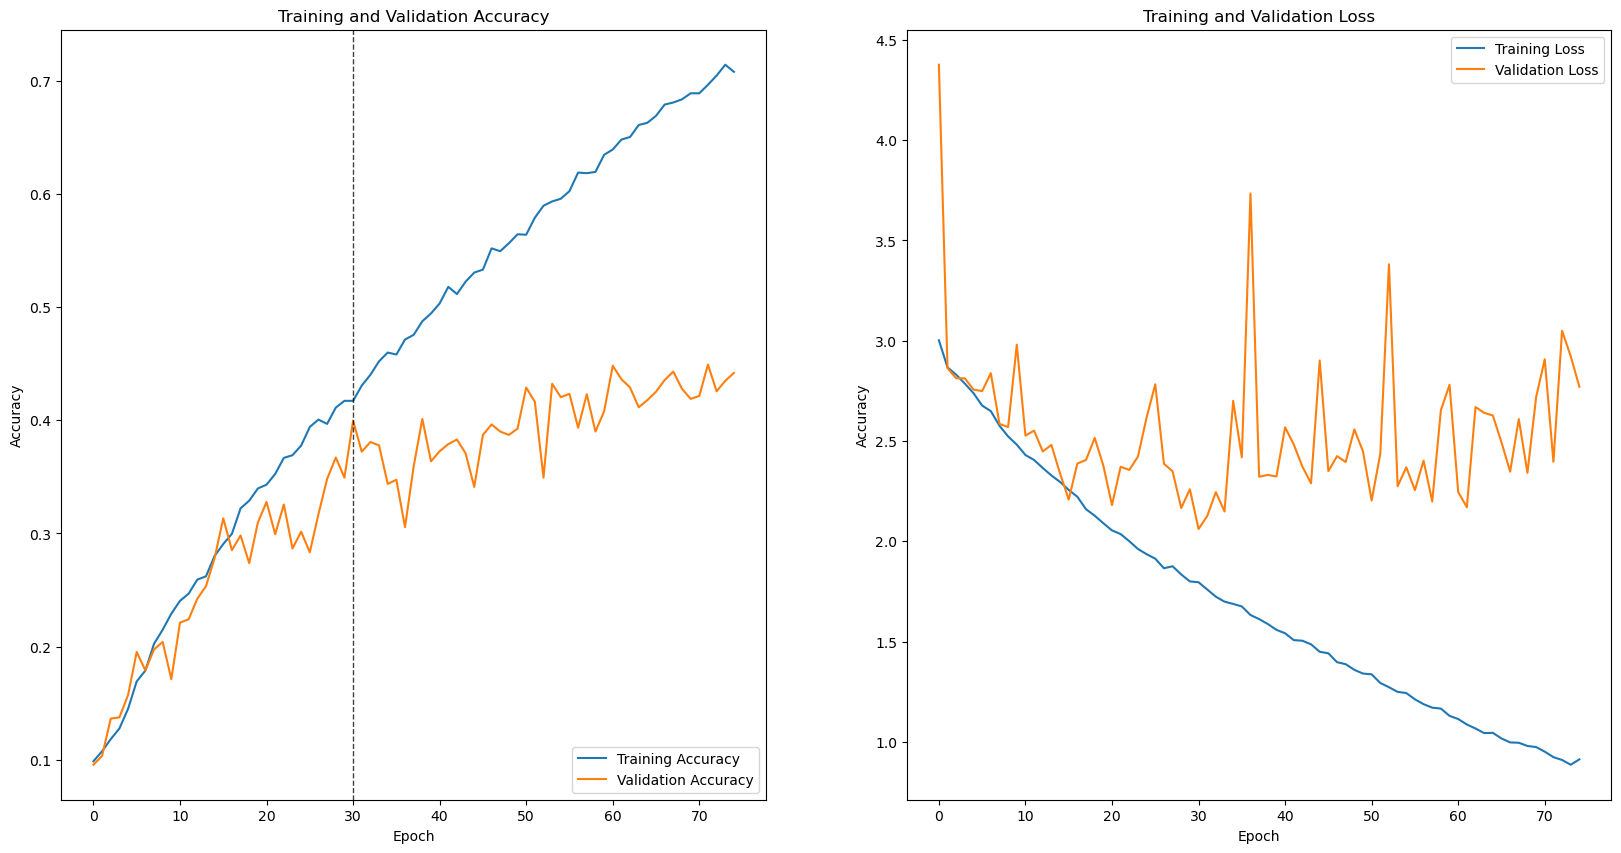

In [34]:
#visualize model performance

#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#optional vertical and horizontal lines to define optimal epoch ranges
plt.axvline(30, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
#plt.axhline(0.41, color = "black", linestyle = '-', linewidth = 1, alpha = 0.75, label = 'Optimal Epochs (30)')


#----------------------------------------------------------

#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:

The training and validation accuracy increased much slower in comparison to the baseline model. The training accuracy achieved roughly 70% and the validation accuracy achieved roughly a 45% accuracy. Once again, the model is very obviously overfit. As mentioned prior, we will need to adjust the early stopping parameter in the future to avoid letting the model continue training while overfitting. We can also see as marked in the 'Training and Validation Accuracy' graph by the vertical line, that a plausible optimum training epoch number would be approximately 30. At this point in the training, we achieve the best validation accuracy (40%) and the model has not begun to completely overfit. 

While the model seemingly performed worse than the baseline, this is actually a step in the right direction. With the addition of the data augmentation in the model training, we have likely limited some of the effect of the data leakage that was casueing our previous baseline model to preform so well. At this point we can continue to make adjustments to our model with the understanding that, while there still may be some unavoidable data leakage, our performance is more reasonable.

Lets import our test data to make predictions and further evaluate the models performance:

# Import Test Data and Make Predictions
 <a id='8'></a>
[Return to Top](#ReturntoTop)

In [35]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=(img_height, img_width),
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

The code below loops over the 'test_set', then generates predicted and true class labels for each batch of input data, then concatenates them with the previous predicted and true class labels stored in the empty defined lists: predictions and labels. The predictions and labels will contain the predicted and true class labels for the entire test set.

In [36]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels

#loop through batch of data and thier corresponding labels
for x, y in test_set:
  
  #generate predictions by taking the max value (highest probability) prediction from the model 
  predictions = np.concatenate([predictions, np.argmax(Batchnorm_model.predict(x), axis = -1)]) 

  #generate true labels from the tensor form to numpy array and extract the true class index with argmax
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 118ms/step


Now that we have generated and stored the data, we can further evaluate our model by creating a confusion matrix, and generating a classification report.

In [37]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [38]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [39]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

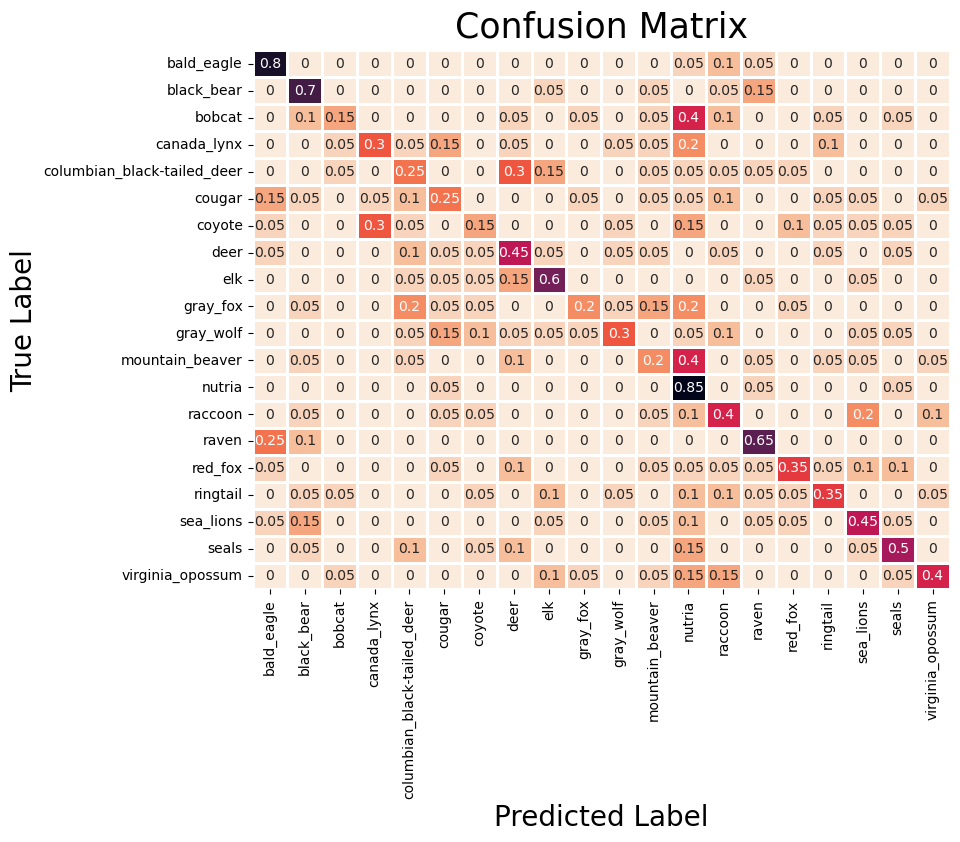

In [40]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations
As we just discussed with the models accuracy, the new model performs much worse in comparison to our baseline model based on the confusion matrix. Again, while the performance seems to take a hit, it is reassuring to see that the model we created is performing more realistically now. 

At first glance we can see that some of the best performing classes are still very unique species such as `blad eagles` and `black bears`. Interestingly we also see that species like `nutria` are performing very well. This species shares many similar attribute to `mountain beavers` which performed very poorly. Since this confusion matrix is a visual representation of the recall for each species, a likely explaination would be that our model is predicting both beavers AND nutria as nutria. It would be expected that the precision for nutria is actually very low. Meaning, that while most of the nutria were predicted correctly(recall), the number of predictions for nutria that were actually nutria were very low (precision) because many were actually beavers.

This concept would also likely explain some of the relationships between other simlar species such as the two specis of deer and elk, or wolves and coyotes, ect...

Lets take a closer look and see if some of our assumptions are correct by generating a classification report to also look at the precision and the f1-scores:

In [41]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       0.57      0.80      0.67        20
                 black_bear       0.52      0.70      0.60        20
                     bobcat       0.43      0.15      0.22        20
                canada_lynx       0.46      0.30      0.36        20
columbian_black-tailed_deer       0.25      0.25      0.25        20
                     cougar       0.29      0.25      0.27        20
                     coyote       0.27      0.15      0.19        20
                       deer       0.33      0.45      0.38        20
                        elk       0.52      0.60      0.56        20
                   gray_fox       0.50      0.20      0.29        20
                  gray_wolf       0.55      0.30      0.39        20
            mountain_beaver       0.24      0.20      0.22        20
                     nutria       0.28      0.85      0.42        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [42]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

,precision,recall,f1-score,support
bald_eagle,0.571429,0.800,0.666667,20.000
black_bear,0.518519,0.700,0.595745,20.000
bobcat,0.428571,0.150,0.222222,20.000
canada_lynx,0.461538,0.300,0.363636,20.000
columbian_black-tailed_deer,0.250000,0.250,0.250000,20.000
cougar,0.294118,0.250,0.270270,20.000
coyote,0.272727,0.150,0.193548,20.000
deer,0.333333,0.450,0.382979,20.000
elk,0.521739,0.600,0.558140,20.000
gray_fox,0.500000,0.200,0.285714,20.000


### Observations

As predicted, the Nutria have a very low precision which is a likely result of classifying the majority of beavers as nutria. So the model essentially lumped together the nutria and the beavers and predicted all the nutria at the cost of predicting any mountain beavers.

How about looking at the f1-scores? The f1-score is refered to as the harmonic mean of the precision and recall, and it is a valuable metric to compare accross models. This new model had weighted average f1-score of 0.40 (compared to 0.77 for the baseline). Again, while it seems that the model is preforming worse, this is much more realistic and a good start for further improvement.

For a bit more clarity, we can sort the classes by their f1-scores and look at the top 5 and bottom 5 performing classes:


In [43]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

,precision,recall,f1-score,support
bald_eagle,0.571429,0.80,0.666667,20.0
black_bear,0.518519,0.70,0.595745,20.0
raven,0.541667,0.65,0.590909,20.0
elk,0.521739,0.60,0.558140,20.0
seals,0.526316,0.50,0.512821,20.0


In [44]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

,precision,recall,f1-score,support
cougar,0.294118,0.25,0.270270,20.0
columbian_black-tailed_deer,0.250000,0.25,0.250000,20.0
bobcat,0.428571,0.15,0.222222,20.0
mountain_beaver,0.235294,0.20,0.216216,20.0
coyote,0.272727,0.15,0.193548,20.0


### Observations

Just to continue the example with the beaver and the nutria, we can see that the nutria is no longer in the top 5 performing classes when we use f1-scores because the precision was so low. This is why it is so important to review muliple metrics and methods beyond accuracy when evaluating the models performace.

We can now look at some of the photos using the function we defined in the previous notebook.

# Optional Load for Future Model Predictions:
 <a id='9'></a>
[Return to Top](#ReturntoTop)

If desired in the future, the code below can be used as an example for loading the model to predict on new data or to continue training. The '.h5' file extension saves the model construction, the trained weights, and time information from `compile()`.

##### SOURCE
https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
#optional code to re-load and predict on new data

load_model = keras.models.load_model("models/Batch_normalization.h5") 


# Test on New Data:
 <a id='10'></a>
[Return to Top](#ReturntoTop)


Lets re-define our prediction model from the previous notebook:

In [1]:
def predict_class(img_path, model):
    
    """
    This function will take in a defined image path as well as the name of the loaded model and then 
    it will show that image, predict on it, and print the prediction
    """
    
    # Define the image size expected by the model
    img_height, img_width = model.input_shape[1:3]

    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Show the image
    plt.imshow(img)
    plt.show()

    # Convert the image to an array and create a batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    #create a list of all class names
    class_names = ['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 
                   'coyote', 'deer', 'elk', 'gray_fox', 'gray_wolf', 'mountain_beaver', 'nutria', 'raccoon', 'raven', 
                   'red_fox', 'ringtail', 'sea_lions', 'seals', 'virginia_opossum']
    
    # Get the predicted class label and confidence
    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Print the predicted class label and confidence
    print("This image most likely belongs to {} with a {:.2f}% confidence."
          .format(pred_class, confidence))

Now load the saved model:

In [8]:
#load the model

load_model = keras.models.load_model('models/Batch_normalization.h5')


To continue on with the example, lets look at some photos in the test directory for nutria and beavers:

In [28]:
#Set some image paths 

nutria1 = "data/oregon_wildlife_test/nutria/2ea9111a53dc829571.jpg"
nutria2 = 'data/oregon_wildlife_test/nutria/007cb65238a6619733.jpg'
beaver1 = "data/oregon_wildlife_test/mountain_beaver/3105f534854eed81cc.jpg"
beaver2 = "data/oregon_wildlife_test/mountain_beaver/18d9ebdbd37c0d11ed.jpg"

In [29]:
#create a list of the image path variables defined above
function_test_list = [nutria1, nutria2, beaver1, beaver2]

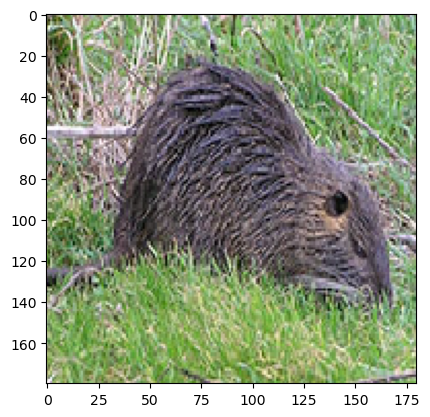

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to nutria with a 11.83% confidence.


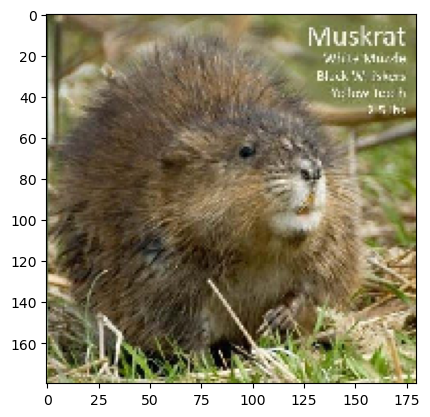

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to nutria with a 12.46% confidence.


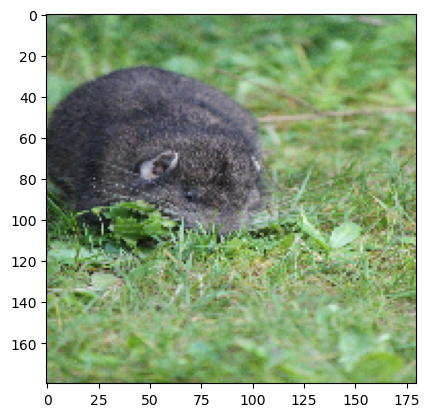

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to nutria with a 9.88% confidence.


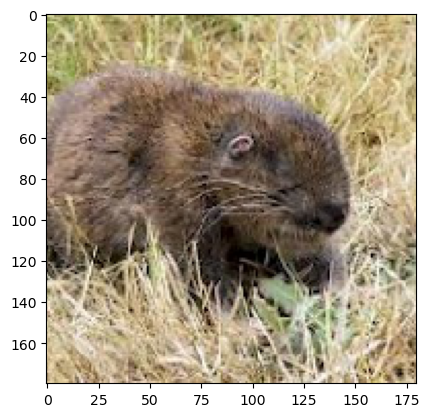

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to nutria with a 12.46% confidence.


In [30]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

### Observations:

As no suprise, the model predicted all four of the examples as nutria even though the second two examples were beavers.

What about some unseen test data from photos I sourced from family and friends?

In [22]:
#Set some image paths 

eagle1 = "randphotos/eagle/mleagle3.jpg"
seal1 = "randphotos/seal/alseal2.JPEG"
deer1 = "randphotos/deer/daldeer1.jpg"
rac1 = 'randphotos/raccoon/alracc2.JPG'

In [23]:
#create a list of the image path variables defined above
function_test_list = [eagle1, seal1, deer1, rac1]

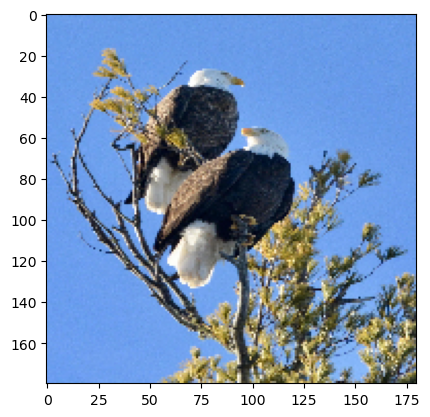

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to bald_eagle with a 12.14% confidence.


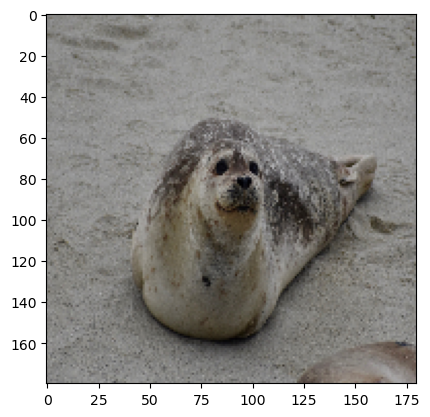

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to seals with a 12.36% confidence.


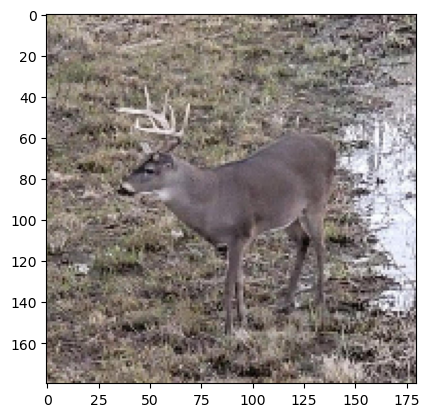

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to mountain_beaver with a 10.95% confidence.


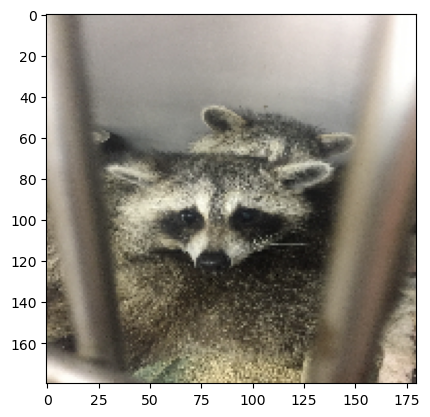

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to raccoon with a 12.52% confidence.


In [24]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

# Observations 

The model was able to predict on 3/4 images we selected. While this isn't a perfect representation of our models performace as discussed above, it is good to see it is effectively predicting on completely new data.

# Summary and Next Steps:
<a id='11'></a>
[Return to Top](#ReturntoTop)

**For our updated model we completed these tasks and determined the following:**

- Added in data augmentation to increase the noise in our data which will help with overfitting as well as assist in our data leakage problem
- Further addressed the overfitting from the baseline model by including drop out layers and batch normalization
- Added additional dense layers to increase some complexity in the model
- Evaluated the models performance and determined the following:
    - The over-all accuracy and weighted f1-score decreased from the baseline, which is likely a sign that the data augmentation was impacting the data leakage problem (so this was not a bad thing)
    - The precision and recall were not well balanced for all classes leading certain classes to "absorb" other classes (Used the example of Nutria and Mountain Beavers)
- Predicted on some test data and some unseen data as well any found that there were areas it performed well and others it struggled in

**Next Steps**

- Now that the data leakage problem addressed to the best of our ability, we will make some additional changes to the model and increase the complexity a bit further to see if we can increase the performance of our new model by its accuracy and its weighted f1-score

### Next steps are located in the Fourth Notebook - '4.0_Regularization_Strategies_Adjusted'

------------------------------------------------------------------------------------------------------------------------------